Date: 03/01/2020
Author: Kritika Dhawale

In [4]:
import pylab as plt
import matplotlib.image as mpimg
import numpy as np

In [1]:
import numpy as np 

def imhist(im):
   #calculates normalized histogram of an image
    m, n = im.shape
    h = [0.0] * 256
    for i in range(m):
        for j in range(n):
            h[im[i, j]]+=1
    return np.array(h)/(m*n)

In [2]:
def cumsum(h):
    # finds cumulative sum of a numpy array, list
    return [sum(h[:i+1]) for i in range(len(h))]

In [3]:
def histeq(im):
    #calculate Histogram
    h = imhist(im)
    cdf = np.array(cumsum(h)) #cumulative distribution function
    sk = np.uint8(255 * cdf)  #finding transfer function values
    s1, s2 = im.shape
    Y = np.zeros_like(im)
    # applying transfered values for each pixels
    for i in range(0, s1):
        for j in range(0, s2):
            Y[i, j] = sk[im[i, j]]
    H = imhist(Y)
    #return transformed image, original and new istogram, 
    # and transform function
    return Y , h, H, sk

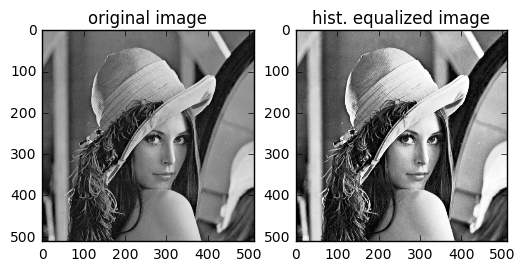

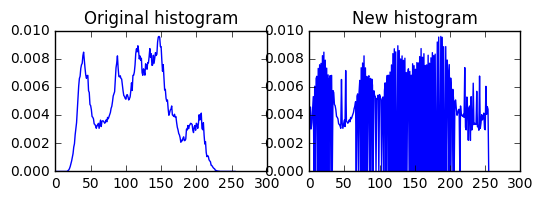

In [8]:
# load image to numpy arrayb
# use scipy or PIL for other formats
img = np.uint8(mpimg.imread('lena.png')*255.0)

# convert to grayscale
# do for individual channels R, G, B, A for nongrayscale images

img = np.uint8((0.2126* img[:,:,0]) + np.uint8(0.7152 * img[:,:,1]) + np.uint8(0.0722 * img[:,:,2]))
new_img, h, new_h, sk = histeq(img)

# show old and new image
# show original image
plt.subplot(121)
plt.imshow(img)
plt.title('original image')
plt.set_cmap('gray')
# show original image
plt.subplot(122)
plt.imshow(new_img)
plt.title('hist. equalized image')
plt.set_cmap('gray')
plt.show()

# plot histograms
fig = plt.figure()
fig.add_subplot(221)
plt.plot(h)
plt.title('Original histogram') # original histogram

fig.add_subplot(222)
plt.plot(new_h)
plt.title('New histogram') #hist of eqlauized image

plt.show()
